In [1]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv')['Lung Cancer']

X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv')['Lung Cancer']

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=156)

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Selected features in Backward Selection: Index(['PM2.5', 'Sociod_EQI', 'CLU50_1', 'NO2', 'O3', 'CO', 'Disel', 'CS2',
       'smoking_data', 'UCI_smoking'],
      dtype='object')
Score -119.0501909988672


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-144.47715800695354, -116.91494837530584, -10...",-122.71086,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",18.637545,14.500643,7.250322
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-141.8397368938886, -113.37418222855001, -103...",-120.391058,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",16.84578,13.106589,6.553295
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-137.04783547699571, -113.33689045037663, -10...",-119.705102,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",15.832439,12.318176,6.159088
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[-138.78461283599546, -115.43897163402559, -10...",-120.297346,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",15.140054,11.779476,5.889738
15,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 15, 16...","[-140.07862623693276, -112.22546547200889, -10...",-120.332683,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",17.404717,13.541461,6.77073
14,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 15, 16, 18)","[-139.55375572440397, -110.90323345703537, -10...",-119.474368,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",17.384512,13.525741,6.76287
13,"(0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 15, 16, 18)","[-139.47796679184714, -113.29433247564874, -10...",-120.013498,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",17.297497,13.45804,6.72902
12,"(0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 16, 18)","[-136.56462457921407, -113.71452119156332, -99...",-119.840829,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",17.357243,13.504525,6.752262
11,"(0, 1, 2, 4, 7, 8, 9, 11, 12, 16, 18)","[-138.73911508594048, -111.0074495324199, -98....",-119.531824,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, NO2, O3...",18.650421,14.510661,7.25533
10,"(0, 2, 4, 7, 8, 9, 11, 12, 16, 18)","[-136.49500863928958, -109.5893794460956, -98....",-119.050191,"(PM2.5, Sociod_EQI, CLU50_1, NO2, O3, CO, Dise...",17.999919,14.004548,7.002274


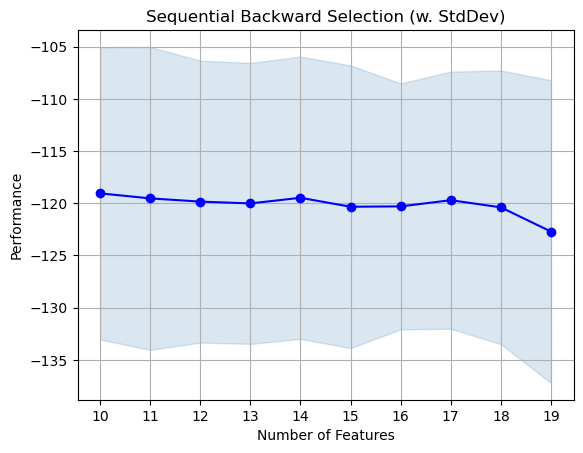

In [4]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [6]:
if 'Unnamed: 0' in X_test.columns:
    X_test.drop(columns=['Unnamed: 0'], inplace=True)

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]     

model.fit(X_train, y_train)
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 109.7357967190533
Mean Absolute Error: 8.227734134271852
R-squared Score: 0.6250145220147525


In [7]:
from sklearn.model_selection import RepeatedKFold

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))

0.5982123415509383

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(5,30,5),
    'n_estimators': np.arange(50,210,50),
    'learning_rate': np.arange(0.01,0.31,0.1)
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'learning_rate': 0.11, 'max_depth': 5, 'n_estimators': 50}
Test set score of the best model: 0.6216056340238103


In [10]:
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test, preds)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 110.73337412290888
Mean Absolute Error: 8.185417317307724
R-squared Score: 0.6216056340238103
